# 1. K-Means类概述

![iamge](1.png)

# 2. KMeans类主要参数

![image](2.png)

# 3. MiniBatchKMeans类主要参数

![image](3.png)

# 4. K值的评估标准

![iamge](4.png)

# 5. K-Means应用实例

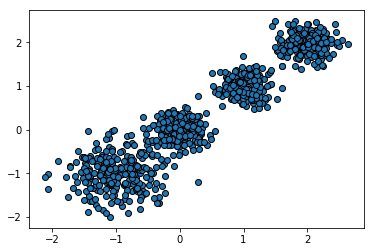

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

# X为样本特征，Y为样本簇类别，共1000个样本，每个样本4个特征，共4个簇，簇中心在[-1,-1], [0,0],[1,1], [2,2]， 簇方差分别为[0.4, 0.2, 0.2]
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]], cluster_std=[0.4, 0.2, 0.2, 0.2],
                 random_state=9)
plt.scatter(X[:, 0], X[:, 1], marker='o', edgecolors='black')
plt.show()

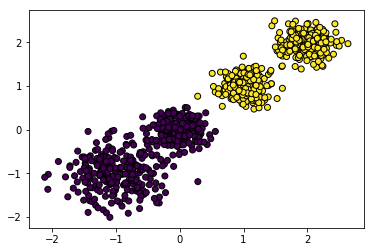

In [2]:
# 现在我们来用K-Means聚类方法来做聚类，首先选择k=2
from sklearn.cluster import KMeans

# fit_predict(X[, y]) Compute cluster centers and predict cluster index for each sample.
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='black')
plt.show()

In [3]:
# 用Calinski-Harabasz Index评估的聚类分数
from sklearn.metrics import calinski_harabaz_score

calinski_harabaz_score(X, y_pred)

3116.1706763322227

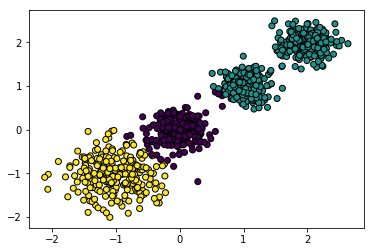

In [4]:
# 现在k=3来看看聚类效果
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='black')
plt.show()

In [5]:
from sklearn.metrics import calinski_harabaz_score

calinski_harabaz_score(X, y_pred)

2931.625030199556

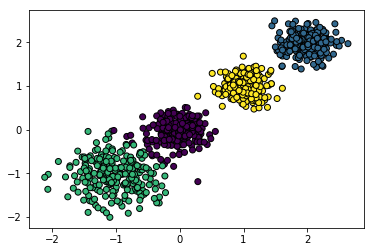

In [6]:
# 现在k=4来看看聚类效果
from sklearn.cluster import KMeans

y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, edgecolors='black')
plt.show()

In [7]:
from sklearn.metrics import calinski_harabaz_score

calinski_harabaz_score(X, y_pred)

5924.050613480169

In [8]:
# 可见k=4的聚类分数比k=2和k=3都要高，这也符合我们的预期，我们的随机数据集也就是4个簇
# 当特征维度大于2，我们无法直接可视化聚类效果来肉眼观察时，用Calinski-Harabaz Index评估是一个很实用的方法

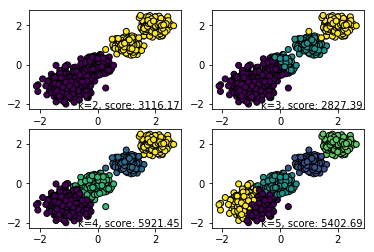

In [9]:
# 现在我们再看看用MiniBatchKMeans的效果，我们将batch size设置为200
# 由于我们的4个簇都是凸的，所以其实batch size的值只要不是非常的小，对聚类的效果影响不大
from sklearn.cluster import MiniBatchKMeans

for index, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, index+1)
    y_pred = MiniBatchKMeans(n_clusters=k, batch_size=200, random_state=9).fit_predict(X)
    score = calinski_harabaz_score(X, y_pred)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='o', edgecolors='black')
    # 当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示"Get Current Figure"和"Get Current Axes"
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
             transform=plt.gca().transAxes, size=10, ha='right')
plt.show()